## Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

# Polynomial fit for $\Delta H (\tau) \text{ with } \tau << 1$

In [2]:
plotData = []
filepath = "outputs/test_md_out.txt"    #Import data from MD simulation without MC
with open(filepath,'r') as inputfile:
        for line in inputfile:
            plotData.append(line.strip().split('\t'))
        for j in range(len(plotData)):
            plotData[j] = [float(plotData[j][i]) for i in range(len(plotData[0]))]
plotData = np.array(plotData)
x = plotData[10:,0]
y = plotData[10:,1]

In [3]:
tau_function = lambda t,a,b : a*t**b
fitParams = opt.curve_fit(tau_function, x, y)[0]
print(fitParams)

[399.66067967   2.01145849]


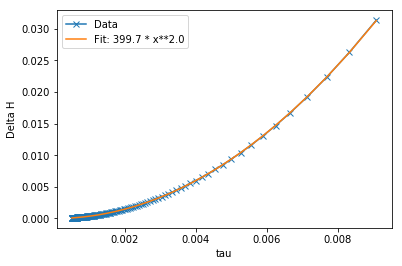

In [4]:
plt.plot(x,y,marker="x",label="Data")
plt.plot(x,tau_function(x,fitParams[0],fitParams[1]),label="Fit: %3.1f * x**%1.1f"%tuple(fitParams))
plt.xlabel("tau")
plt.ylabel("Delta H")
plt.legend()
plt.show()

## Check if momenta in heat bath have a Gaussian distribution

In [5]:
filepath = "outputs/heatbath_test_out.txt"
plotData = []

In [6]:
with open(filepath,'r') as inputfile:
        for line in inputfile:
            plotData.append(line.strip().split('\t')) #Tab is used as seperator between values
        for j in range(len(plotData)): #Cast list items from string to float type
            plotData[j] = [float(plotData[j][i]) for i in range(len(plotData[0]))] # cast entries to float
plotData = np.array(plotData)

In [7]:
h = plotData[:,0]

g = plotData[:,1]

num_bins = 50

In [8]:
x = np.linspace(-5, 5, 200)
y = 60/np.sqrt(np.pi*2)*np.exp(-np.square(x)/2)

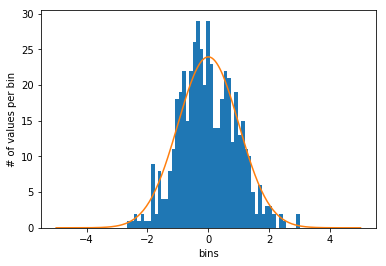

In [9]:
plt.hist(h, num_bins)
plt.plot(x, y)
plt.xlabel("bins")
plt.ylabel("# of values per bin")
plt.show()

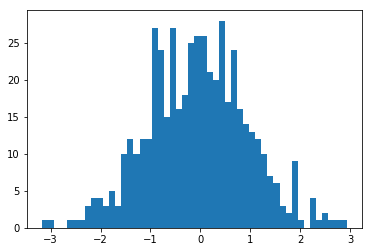

In [10]:
plt.hist(g,num_bins)
plt.show()